In [1]:
import os
import pandas as pd

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from utils.modules.feature_extraction import FeatureExtraction as FeatureExtraction
from utils.modules.model_validation import ModelValidation as ModelValidation

In [2]:
currentFolder = os.getcwd()

In [3]:
data = pd.read_parquet(os.path.join(currentFolder, 'preprocessedData.parquet'))

In [4]:
data['UNION'] = data.apply(lambda x: ' '.join(list(set(list(x['PRE_PROS']) + list(x['PRE_CONS'])))), axis = 1)
data['PRE_PROS'] = data['PRE_PROS'].apply(lambda x: ' '.join(x))
data['PRE_CONS'] = data['PRE_CONS'].apply(lambda x: ' '.join(x))

In [5]:
fittedModelPROS = FeatureExtraction()
fittedModelPROS.fit(df = data, column_name = 'PRE_PROS')
fittedModelPROS.topic_modeling_nmf(n_components = 3, num_words = 20)

TF-IDF vectorizer fitted with 753  unique words


In [6]:
fittedModelPROS.create_topics();

          topic0  topic1  topic2  relevant_topics_id
ticket_0    0.00    0.00    0.01                   2
ticket_1    0.14    0.00    0.00                   0
ticket_2    0.00    0.00    0.18                   2
ticket_3    0.08    0.06    0.08                   0
ticket_4    0.11    0.00    0.00                   0


In [7]:
fittedModelPROS.topic_mapping(
    dict_mapping = {
        0:'Beneficios, salario y flexibilidad laboral.',
        1:'Crecimiento, estabilidad y aprendizaje profesional.',
        2:'Oportunidades, flexibilidad y desarrollo remoto.',
    }
)

fittedModelPROS.df = fittedModelPROS.df.rename(
    columns = {
        'relevant_topics_id': 'PRE_PROS_TOPIC_ID', 
        'relevant_topics_text': 'PRE_PROS_TOPIC_TEXT'
    }
)

In [8]:
fittedModelPROS.df

,PROS,CONS,PRE_PROS,PRE_CONS,UNION,PRE_PROS_TOPIC_ID,PRE_PROS_TOPIC_TEXT
0,Mucha capacitacion opciones de crecimiento y p...,Largas jornadas de trabajo durante semana y fi...,much crecimient proyect,larg seman fin seman,much proyect larg crecimient fin seman,2,"Oportunidades, flexibilidad y desarrollo remoto."
1,"Buenas prestaciones, oportunidad de crecimiento.",Los puestos son heredados a amigos o conocidos...,buen prestacion,puest hered amig conoc,prestacion hered buen conoc puest amig,0,"Beneficios, salario y flexibilidad laboral."
2,flexibilidad horaria y trabajo desde casa iiii...,salario bajo,flexibil cas,salari,salari cas flexibil,2,"Oportunidades, flexibilidad y desarrollo remoto."
3,"Buenas prestaciones, salario por encima del me...","Distancia de las oficinas, burocracia.",buen prestacion encim merc buen laboral flexib...,,aprendizaj prestacion encim merc buen laboral ...,0,"Beneficios, salario y flexibilidad laboral."
4,Muy buen ambiente de trabajo aprendí muchísimo,A cada rato hay recortes cada Q hay incertidum...,buen aprend,cad incertidumbr van desped,desped buen incertidumbr cad van aprend,0,"Beneficios, salario y flexibilidad laboral."
...,...,...,...,...,...,...,...
3053,Gran ambiente de trabajo con buena flexibilida...,El campus de Guadalajara está muy retirado de ...,gran buen flexibil,campus guadalaj retir ciud,buen retir flexibil ciud guadalaj gran campus,2,"Oportunidades, flexibilidad y desarrollo remoto."
3054,"Organización, ambiente relajado. Gran crecimie...",Al ser tan grande aveces se pierde la individu...,relaj gran crecimient profesional,pierd individual dificil crec,crec relaj individual dificil pierd gran creci...,1,"Crecimiento, estabilidad y aprendizaje profesi..."
3055,"Constante aprendizaje, gente preparada, buenas...",Depende del proyecto en el que estés que tan b...,aprendizaj prepar buen prestacion,depend vay,aprendizaj prestacion prepar buen depend vay,0,"Beneficios, salario y flexibilidad laboral."
3056,Planes de salud y mejoras en los beneficios gl...,"No mucho para comentar, el horario y no politi...",plan salud mejor benefici global,,salud global plan mejor benefici,0,"Beneficios, salario y flexibilidad laboral."


In [9]:
modelval = ModelValidation(df = fittedModelPROS.df, processed_text = 'PRE_PROS', ids_col = 'PRE_PROS_TOPIC_ID',  labels_col = 'PRE_PROS_TOPIC_TEXT')

In [10]:
modelval.fit_transform()
modelval.transform_tfidf()
modelval.split_train_test()

ROC AUC Score Train: 0.96
ROC AUC Score Test: 0.86
precision_train 0.8356634316602369
precision_test 0.8007190464301844
recall_train 0.7920560747663551
recall_test 0.738562091503268
Train Accuracy:  0.79
Test Accuracy:  0.74
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86      1347
           1       0.96      0.41      0.57       404
           2       0.98      0.47      0.64       389

    accuracy                           0.79      2140
   macro avg       0.90      0.63      0.69      2140
weighted avg       0.84      0.79      0.77      2140

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       571
           1       0.92      0.27      0.42       171
           2       0.98      0.35      0.51       176

    accuracy                           0.74       918
   macro avg       0.87      0.54      0.59       918
w

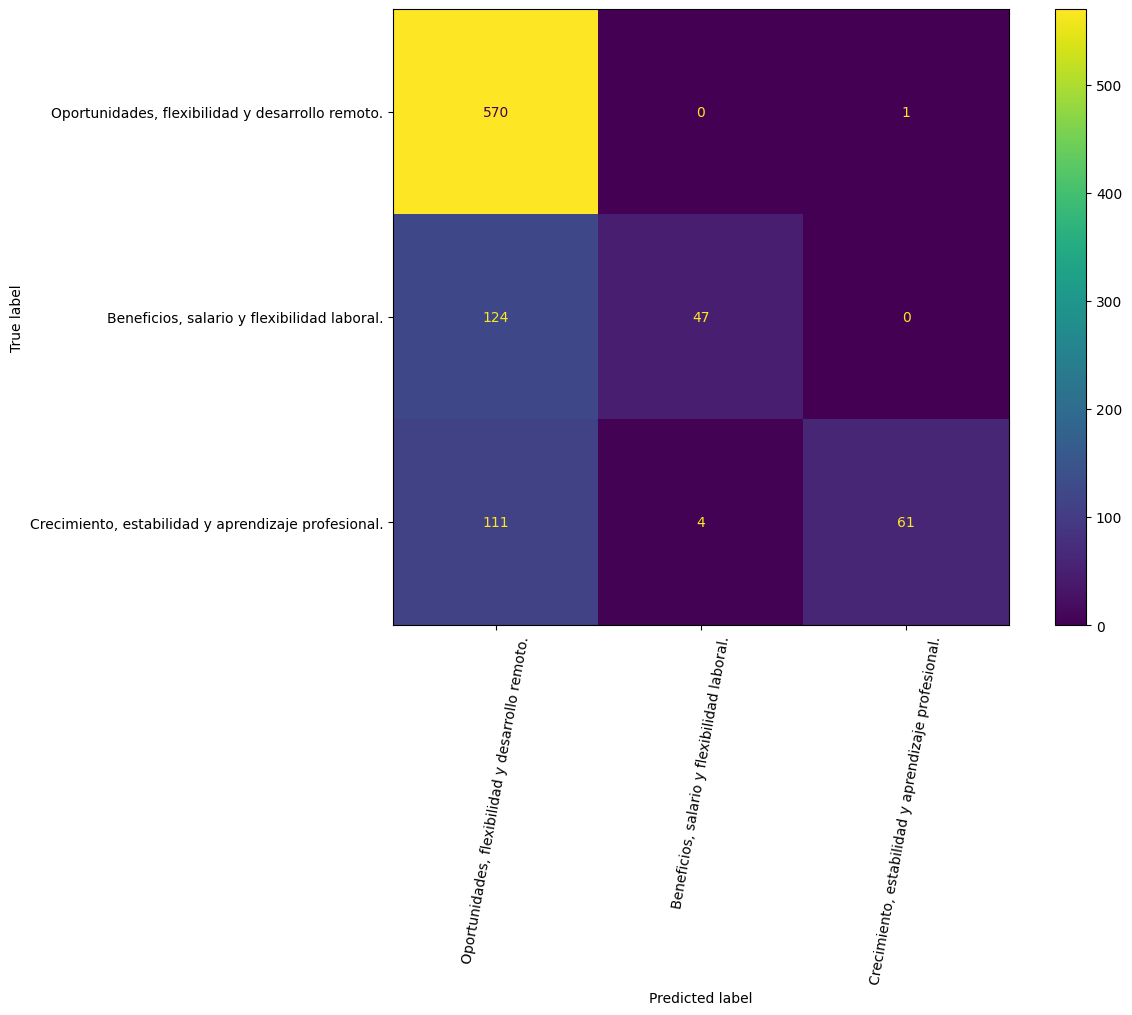

In [11]:
mnb = MultinomialNB()
modelval.model_fit(model = mnb)
modelval.display_classification_report()

ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.93
precision_train 1.0
precision_test 0.916606718552565
recall_train 1.0
recall_test 0.9150326797385621
Train Accuracy:  1.0
Test Accuracy:  0.92
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1347
           1       1.00      1.00      1.00       404
           2       1.00      1.00      1.00       389

    accuracy                           1.00      2140
   macro avg       1.00      1.00      1.00      2140
weighted avg       1.00      1.00      1.00      2140

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       571
           1       0.89      0.91      0.90       171
           2       0.82      0.86      0.84       176

    accuracy                           0.92       918
   macro avg       0.89      0.90      0.89       918
weighted avg       0.92      0.92

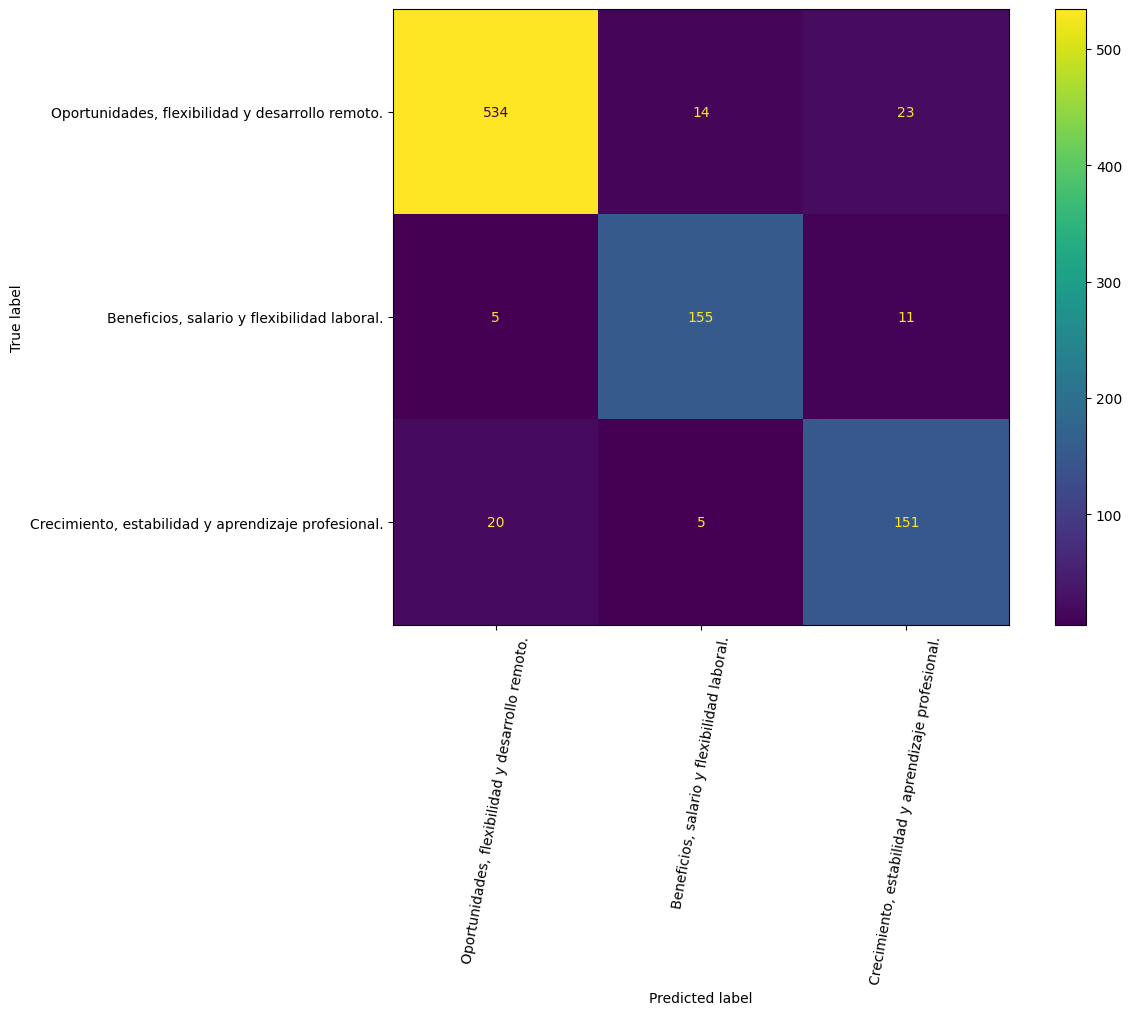

In [12]:
dtc = DecisionTreeClassifier(random_state=40)
modelval.model_fit(model = dtc)
modelval.display_classification_report()